# Libraries and Data Loading

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
#load the datasets
data_errors = pd.read_csv("E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Predictive Maintenance\Data\Microsoft Azure Predictive Maintenance\PdM_errors.csv")
data_failures = pd.read_csv("E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Predictive Maintenance\Data\Microsoft Azure Predictive Maintenance\PdM_failures.csv")
data_machines = pd.read_csv("E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Predictive Maintenance\Data\Microsoft Azure Predictive Maintenance\PdM_machines.csv")
data_maint = pd.read_csv("E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Predictive Maintenance\Data\Microsoft Azure Predictive Maintenance\PdM_maint.csv")
data_telemetry = pd.read_csv("E:\Personal Folder\Personal Projects\Python\Projects\Personal Projects\Predictive Maintenance\Data\Microsoft Azure Predictive Maintenance\PdM_telemetry.csv")

# Error Data
This data describes the errors in the machines while operating. 
As these errors do not cause machine shutdowns, they are not classified as failures. The error dates and times are approximated to the nearest hour due to the telemetry data being collected on an hourly basis.


### Error Data Cleaning

In [4]:
data_errors.info

<bound method DataFrame.info of                  datetime  machineID errorID
0     2015-01-03 07:00:00          1  error1
1     2015-01-03 20:00:00          1  error3
2     2015-01-04 06:00:00          1  error5
3     2015-01-10 15:00:00          1  error4
4     2015-01-22 10:00:00          1  error4
...                   ...        ...     ...
3914  2015-11-21 08:00:00        100  error2
3915  2015-12-04 02:00:00        100  error1
3916  2015-12-08 06:00:00        100  error2
3917  2015-12-08 06:00:00        100  error3
3918  2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]>

In [5]:
data_errors.shape

(3919, 3)

In [6]:
# Sort the error data based on "datetime", "machineID", "errorID" for better readability
data_errors = data_errors.sort_values(["datetime", "machineID", "errorID"]).reset_index(drop=True)

In [7]:
data_errors.machineID = data_errors.machineID.astype('category')
data_errors.errorID = data_errors.errorID.astype('category')

In [8]:
data_errors.datetime.describe(datetime_is_numeric=True)

count                    3919
unique                   2720
top       2015-12-08 06:00:00
freq                       12
Name: datetime, dtype: object

In [9]:
print('Missing values in the dataset : ',data_errors.isna().sum().sum())
print('Duplicate values in the dataset : ',data_errors.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


### Exploratory Data Analysis

In [10]:
# Count the occurrence of each errorID per machineID
error_counts = data_errors.groupby(['machineID', 'errorID']).size().reset_index(name='count')

# Find the maximum occurrence of errorID per machineID
max_errors = error_counts.groupby('machineID')['count'].idxmax()

# Get the errorID that occurs most frequently per machineID
most_frequent_errors = error_counts.loc[max_errors]

# Print the result
print(most_frequent_errors)

    machineID errorID  count
0           1  error1     11
6           2  error2     10
10          3  error1     11
16          4  error2     11
20          5  error1     14
..        ...     ...    ...
478        96  error4     12
483        97  error4     15
486        98  error2     12
491        99  error2     17
495       100  error1     11

[100 rows x 3 columns]


### Data Visualization

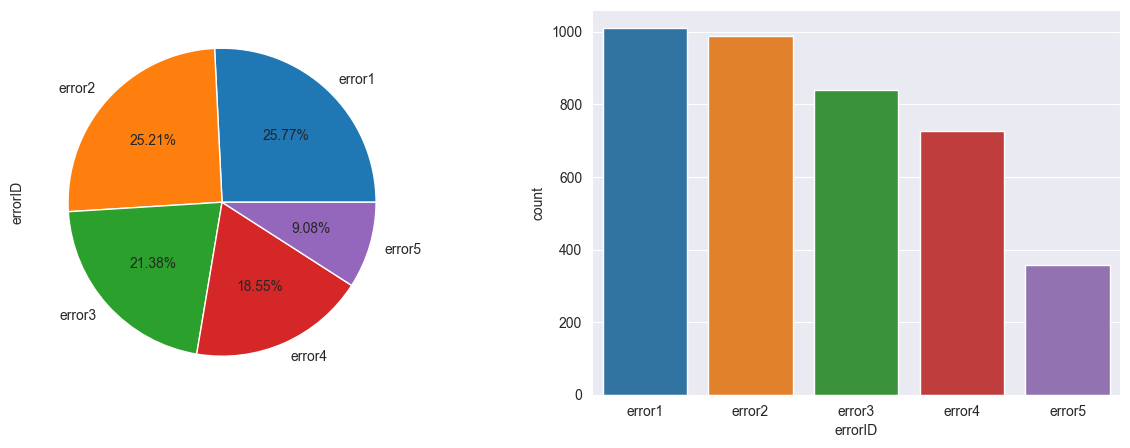

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data_errors['errorID'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x='errorID', data=data_errors, order=sorted(data_errors['errorID'].unique()))
plt.show()

Error 1 and Error 2 occur the most frequently

# Failure Data

In [12]:
data_failures.info

<bound method DataFrame.info of                 datetime  machineID failure
0    2015-01-05 06:00:00          1   comp4
1    2015-03-06 06:00:00          1   comp1
2    2015-04-20 06:00:00          1   comp2
3    2015-06-19 06:00:00          1   comp4
4    2015-09-02 06:00:00          1   comp4
..                   ...        ...     ...
756  2015-11-29 06:00:00         99   comp3
757  2015-12-14 06:00:00         99   comp4
758  2015-02-12 06:00:00        100   comp1
759  2015-09-10 06:00:00        100   comp1
760  2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

In [13]:
data_failures.shape

(761, 3)

In [14]:
data_failures.head

<bound method NDFrame.head of                 datetime  machineID failure
0    2015-01-05 06:00:00          1   comp4
1    2015-03-06 06:00:00          1   comp1
2    2015-04-20 06:00:00          1   comp2
3    2015-06-19 06:00:00          1   comp4
4    2015-09-02 06:00:00          1   comp4
..                   ...        ...     ...
756  2015-11-29 06:00:00         99   comp3
757  2015-12-14 06:00:00         99   comp4
758  2015-02-12 06:00:00        100   comp1
759  2015-09-10 06:00:00        100   comp1
760  2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

### Exploratory Data Analysis

In [15]:
print('Missing values in the dataset : ',data_failures.isna().sum().sum())
print('Duplicate values in the dataset : ',data_failures.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


In [16]:
# Count the occurrence of each failure per machineID
failure_counts = data_failures.groupby(['machineID', 'failure']).size().reset_index(name='count')

# Find the maximum occurrence of failure per machineID
max_failure = failure_counts.groupby('machineID')['count'].idxmax()

# Get the failure that occurs most frequently per machineID
most_frequent_failure = failure_counts.loc[max_failure]

# Print the result
print(most_frequent_failure)

     machineID failure  count
2            1   comp4      4
4            2   comp2      3
6            3   comp2      4
8            4   comp2      4
9            5   comp1      4
..         ...     ...    ...
246         96   comp3      5
249         97   comp4      4
252         98   comp3      5
255         99   comp2      6
258        100   comp1      2

[98 rows x 3 columns]


In [17]:
failure_counts.head

<bound method NDFrame.head of      machineID failure  count
0            1   comp1      1
1            1   comp2      2
2            1   comp4      4
3            2   comp1      1
4            2   comp2      3
..         ...     ...    ...
255         99   comp2      6
256         99   comp3      6
257         99   comp4      5
258        100   comp1      2
259        100   comp2      1

[260 rows x 3 columns]>

In [18]:
# Determine the most common failure type
most_common_failure_type = failure_counts['failure'].value_counts().index[0]
print(f'The most common failure is {most_common_failure_type}')

The most common failure is comp2


In [19]:
# Identify any trends in the data
data_failures.index = pd.to_datetime(data_failures.index)
failure_counts_by_day = data_failures.groupby(pd.Grouper(freq="D"))["failure"].value_counts()
failure_counts_by_day = failure_counts_by_day.rename("count").reset_index().rename(columns={"failure": "Failure Type"})
failure_counts_by_day = failure_counts_by_day.set_index("Failure Type")
failure_counts_by_day = failure_counts_by_day.drop(failure_counts_by_day.columns[0], axis=1)
print(failure_counts_by_day)

              count
Failure Type       
comp2           259
comp1           192
comp4           179
comp3           131


### Data Visualizations

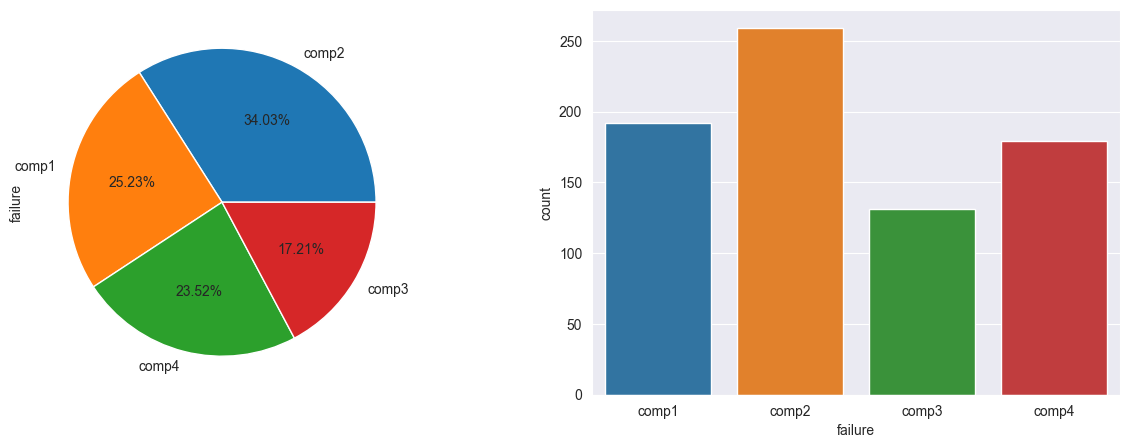

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data_failures['failure'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x='failure', data=data_failures, order=sorted(data_failures['failure'].unique()))
plt.show()

# Telemetry Data
This data describes the telemetry in the machines while operating. 
This data consists of the hourly average of voltage, rotation, pressure, vibration collected from 100 machines for 2015.

### Telemetry Data Cleaning

In [23]:
data_telemetry.info

<bound method DataFrame.info of                    datetime  machineID        volt      rotate    pressure  \
0       2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1       2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2       2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3       2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4       2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                     ...        ...         ...         ...         ...   
876095  2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096  2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097  2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098  2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099  2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
0       45.

In [24]:
data_telemetry.head

<bound method NDFrame.head of                    datetime  machineID        volt      rotate    pressure  \
0       2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1       2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2       2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3       2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4       2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                     ...        ...         ...         ...         ...   
876095  2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096  2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097  2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098  2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099  2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
0       45.08

In [25]:
# Sort the error data based on "datetime", "machineID", "errorID" for better readability
data_telemetry = data_telemetry.sort_values(["datetime", "machineID", "volt","rotate","pressure","vibration"]).reset_index(drop=True)

In [26]:
print('Missing values in the dataset : ',data_telemetry.isna().sum().sum())
print('Duplicate values in the dataset : ',data_telemetry.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


### Exploratory Data Analysis

In [27]:
data_telemetry['Outlier'] = ""
vibration_median = data_telemetry['vibration'].median()
vibration_std = data_telemetry['vibration'].std()

for index, row in data_telemetry.iterrows():
    if abs(row['vibration'] - vibration_median) > 3 * vibration_std:
        data_telemetry.at[index, 'Outlier'] = "Outlier"
outliers = data_telemetry[abs(data_telemetry['vibration'] - vibration_median) > 3 * vibration_std]
print(outliers)


                   datetime  machineID        volt      rotate    pressure  \
5       2015-01-01 06:00:00          6  136.878588  492.088420  149.003582   
116     2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
167     2015-01-01 07:00:00         68  161.934640  453.713913  117.837725   
316     2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
350     2015-01-01 09:00:00         51  200.612935  323.752111  144.657425   
...                     ...        ...         ...         ...         ...   
875066  2015-12-31 20:00:00         67  173.147731  465.985813   97.241879   
875215  2015-12-31 22:00:00         16  172.082305  409.326464  100.573010   
875677  2016-01-01 02:00:00         78  202.829867  455.104999  101.508020   
875892  2016-01-01 04:00:00         93  182.867119  491.584480   90.332643   
875966  2016-01-01 05:00:00         67  181.821877  467.204461  100.353146   

        vibration  Outlier  
5       22.973289  Outlier  
116  

In [28]:
# Calculate the summary statistics of the dataset
summary_stats = data_telemetry.describe()
print(summary_stats)

# Calculate the correlation between the variables
correlation = data_telemetry.corr()
print(correlation)

           machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072  
           machineID      volt    rotate  pressure  vibration
machineID   1.000000 -0.001037  0.000171  0.005192  -0.000922
volt       -0.001037  1.000000 -0.001511  0.001

### Data Visualization

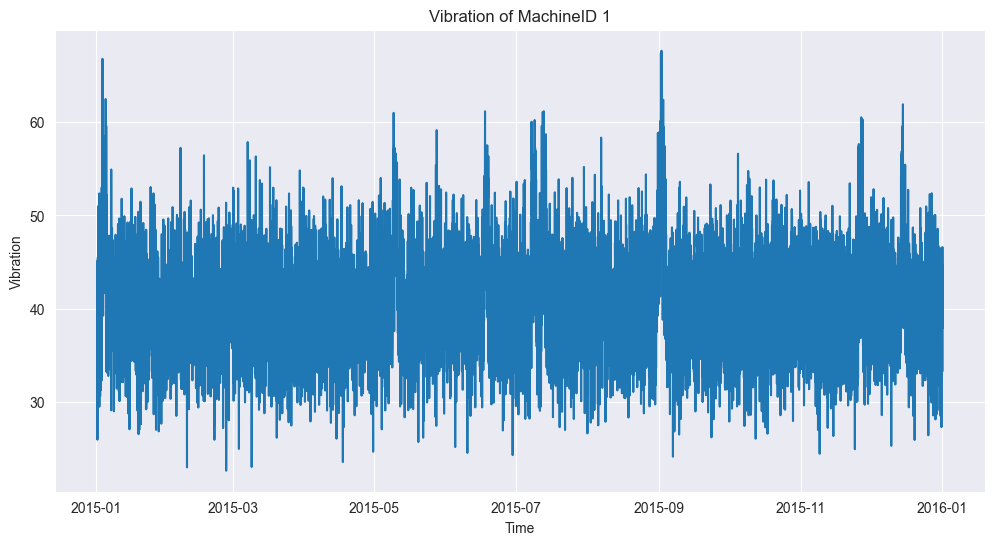

In [29]:
# Filter the dataframe to get data for machineID 1
machine1_data = data_telemetry[data_telemetry['machineID'] == 1]

# Convert the 'datetime' column to datetime type
machine1_data['datetime'] = pd.to_datetime(machine1_data['datetime'])

# Plotting the vibration vs time
plt.figure(figsize=(12, 6))
plt.plot(machine1_data['datetime'], machine1_data['vibration'])
plt.title('Vibration of MachineID 1')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.grid(True)
plt.show()


# Machine Learning

## Time Series Forecast Model

### Machine Selection

In [30]:
# Selecting machineID #7 for analyis
df_machine = data_telemetry.loc[data_telemetry['machineID']==7].reset_index(drop=True)
df_machine.head(n=5)

,datetime,machineID,volt,rotate,pressure,vibration,Outlier
0,2015-01-01 06:00:00,7,156.006391,519.497905,105.878295,42.522245,
1,2015-01-01 07:00:00,7,216.913502,510.541109,106.831651,52.667321,
2,2015-01-01 08:00:00,7,175.150525,453.674445,96.961839,32.397171,
3,2015-01-01 09:00:00,7,168.268241,488.003332,102.497877,37.645481,
4,2015-01-01 10:00:00,7,171.786580,513.935659,105.237040,33.989741,


In [31]:
# Analyzes the failure data for machineID #7
df_machine_fails = data_failures.loc[data_failures['machineID']==7]
pd.DataFrame(df_machine_fails)

,datetime,machineID,failure
1970-01-01 00:00:00.000000029,2015-01-24 06:00:00,7,comp2
1970-01-01 00:00:00.000000030,2015-01-24 06:00:00,7,comp4
1970-01-01 00:00:00.000000031,2015-02-08 06:00:00,7,comp1
1970-01-01 00:00:00.000000032,2015-04-24 06:00:00,7,comp1
1970-01-01 00:00:00.000000033,2015-05-09 06:00:00,7,comp4
1970-01-01 00:00:00.000000034,2015-05-24 06:00:00,7,comp2
1970-01-01 00:00:00.000000035,2015-07-08 06:00:00,7,comp2
1970-01-01 00:00:00.000000036,2015-09-21 06:00:00,7,comp4
1970-01-01 00:00:00.000000037,2015-10-21 06:00:00,7,comp2
1970-01-01 00:00:00.000000038,2015-12-20 06:00:00,7,comp1


In [32]:
# Analyzes the error data for machineID #7
df_machine_errors = data_errors.loc[data_errors['machineID']==7]
pd.DataFrame(df_machine_errors).head()

,datetime,machineID,errorID
190,2015-01-17 20:00:00,7,error1
241,2015-01-21 07:00:00,7,error3
260,2015-01-23 06:00:00,7,error2
261,2015-01-23 06:00:00,7,error3
262,2015-01-23 06:00:00,7,error5


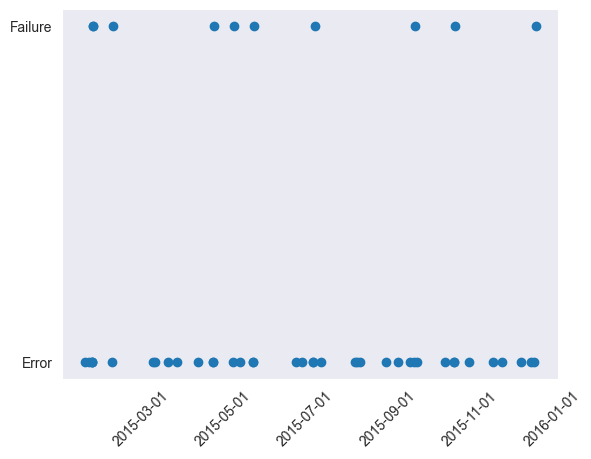

In [33]:
fig, ax = plt.subplots()
# using two different values in the y-axis to differentiate between error and failure
y_cat = list()

for iteration in range(0,len(df_machine_fails)):
    y_cat.append('Failure')

for iteration in range(0,len(df_machine_errors)):
    y_cat.append('Error')

# Obtain timestamp from error and selected failure
df_timestamp = pd.concat([df_machine_fails['datetime'],df_machine_errors['datetime']],ignore_index=True,axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp,"category": y_cat})
df_plot.loc[:,'timestamp'] = pd.to_datetime(df_plot.loc[:,'timestamp'])
df_plot.sort_values(by=['timestamp'],inplace = True,ignore_index=True)

ax.scatter('timestamp','category',data=df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x',rotation=45)
ax.grid()

##### The plot above indicates that errors often precede failures. However, not all errors result in immediate failures. Sometimes, time may pass prior to machine failure. 

## Feature Check

Text(0, 0.5, 'Rotation')

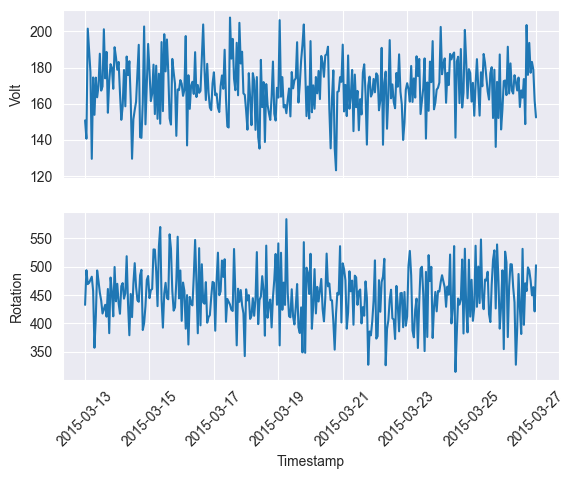

In [35]:
# Change datetype of the timestamp column from object to datetime
df_machine.loc[:,'datetime'] = pd.to_datetime(df_machine.loc[:,'datetime'])

# Select the date to check from failure records
date_selection = df_machine.loc[df_machine['datetime'] == "2015-03-20"].index.values[0]

# Filter the telemetry data by the date and allow 7 days before/after the error occurs to determine any abnormalities

filtered_data = df_machine.loc[date_selection-7*24:date_selection+7*24,:]

# Plot volt and rotation feature
fig,ax = plt.subplots(nrows=2,sharex=True)
ax[0].plot('datetime', 'volt', data=filtered_data)
ax[0].set_ylabel("Volt")

ax[1].plot('datetime', 'rotate', data=filtered_data)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Timestamp")
ax[1].set_ylabel("Rotation")

##### Upon observing the voltage and rotation readings, the period around 3/20/2015 does not indicate any noticeable anomalies. Next, the program checks both the pressure and vibration features by plotting them

Text(0, 0.5, 'Vibration')

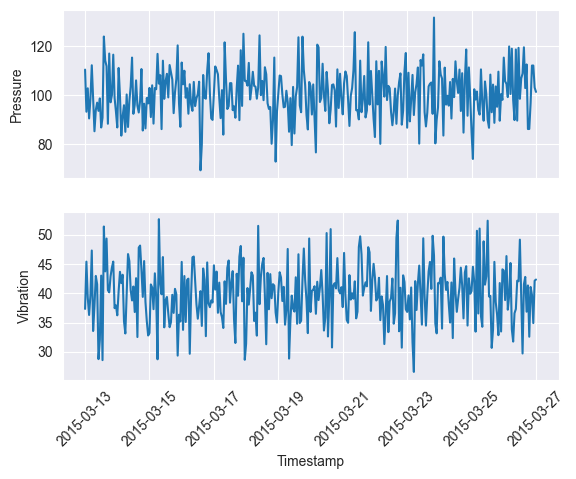

In [37]:
# Plot pressure and vibration feature
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot('datetime', 'pressure', data=filtered_data)
ax[0].set_ylabel("Pressure")

ax[1].plot('datetime', 'vibration', data=filtered_data)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel("Timestamp")
ax[1].set_ylabel("Vibration")

##### Between pressure and vibration, abnormality around the period of 3/20/2015 is more noticeable. 

### Check autocorrelation and partial autocorrelation
##### Tests the autocorrelation and partial autocorrelation function of the data that will influence the model and parameter selection in time-series data

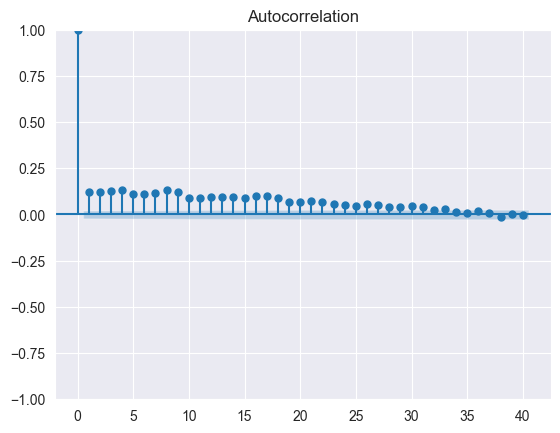

In [40]:
# Import plotting function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(df_machine['pressure'], lags = 40)
plt.show()

##### From the AC plot, the data is positively correlated up to lags of 40, where the AC value itself is quite low, indicating that the data does not have strong AC properties

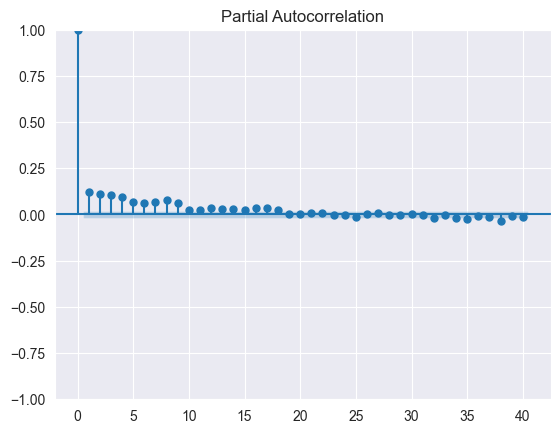

In [42]:
# Partial autocorrelation plot
plot_pacf(df_machine['pressure'], lags = 40)
plt.show()

##### From the partial autocorrelation plot, the correlation between values of two different points in time is also quite weak, decaying to zero starting in the 10th  lags. This information will be used in determining the lag in the model.

## Model Selection

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Select the date to check from failure records
selection_train = df_machine.loc[df_machine['datetime'] == "2015-03-20"].index.values[0]

# Then, filter the data to include approximately one month window
start_period = selection_train - 14 * 24
end_period = selection_train + 14 * 24

def create_feature(start, end):
    # Create features from the selected machine
    pressure = df_machine.loc[start: end, 'pressure']
    timestamp = pd.to_datetime(df_machine.loc[start: end, 'datetime'])
    timestamp_hour = timestamp.dt.hour
    timestamp_dow = timestamp.dt.dayofweek

    # Apply one-hot encoding for timestamp data
    timestamp_hour_onehot = pd.get_dummies(timestamp_hour).to_numpy()

    # Apply min-max scaler to numerical data
    scaler = MinMaxScaler()
    pressure = scaler.fit_transform(np.array(pressure).reshape(-1, 1))

    # Combine features into one
    feature = np.concatenate([pressure, timestamp_hour_onehot], axis=1)

    X = feature[:-1]
    y = np.array(feature[5:, 0]).reshape(-1, 1)

    return X, y, scaler

X, y, pres_scaler = create_feature(start_period, end_period)


##### The code prepares the data for a machine learning model that aims to predict 'pressure' values using the time of day as one of the features. It creates a sliding window dataset, where past observations are used to predict future 'pressure' values. The time window of one month helps capture temporal patterns in the data.

##### Next, it is necessary to further mold the input into a sequence, represented as a 3-dimensional numpy array. Our objective is to devise a function that yields both input and output sequences, with each input sequence comprising observations for five data points. In essence, we will be utilizing data from the past five hours to predict the sensor reading for the subsequent one hour.

In [46]:
def shape_sequence(arr, step, start):
    out = list()
    for i in range(start, arr.shape[0]):
        low_lim = i
        up_lim = low_lim + step
        out.append(arr[low_lim: up_lim])

        if up_lim == arr.shape[0]:
          # print(i)
          break

    out_seq = np.array(out)
    return out_seq

# Shape the sequence according to the length specified
X_seq = shape_sequence(X, 5, 0)
y_seq = shape_sequence(y, 1, 0)

# Separate the input and output for train and validation
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

print("Training data shape = ", X_train.shape)
print("Validation data shape = ", X_val.shape)

Training data shape =  (534, 5, 25)
Validation data shape =  (134, 5, 25)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.losses as loss


def create_model(X_train, y_train):
  shape = X_train.shape[1]
  feat_length = X_train.shape[2]

  model = Sequential()
  model.add(LSTM(shape, activation='tanh', input_shape=(shape, feat_length), return_sequences=True))
  model.add(LSTM(shape, activation='tanh', input_shape=(shape, feat_length), return_sequences=False))
  model.add(Dense(shape, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer=Adam(learning_rate=0.035),
                loss=loss.mean_squared_error)
  model.fit(X_train, y_train, verbose=1, epochs=500)

  return model

model = create_model(X_train, y_train)

Epoch 1/500
17/17 [==============================] - 3s 2ms/step - loss: 0.0820
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0275
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 8/500
17/17 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 11/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 12/500
17/17 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 13/500
17/17 [=================

##### This code sets up a simple two-layer LSTM neural network for regression, compiles it using the Adam optimizer with Mean Squared Error loss, and trains it on the provided input data X_train and target values y_train. The resulting trained model is then stored in the variable model.

##### This output represents the training progress of the neural network model over multiple epochs during the training process. Each epoch corresponds to one complete pass through the entire training dataset.

Here's the breakdown of the output:

Epoch X/500: The current epoch number out of the total number of epochs (500 in this case).

17/17: The number of batches processed in the current epoch and the total number of batches in the training dataset. It indicates that the training data is divided into 17 batches, and all 17 batches have been processed in this epoch.

[==============================]: A visual representation of the progress bar, indicating how much of the current epoch has been completed. Each '=' represents a batch processed.

- 0s 2ms/step: The time taken to process each batch and the estimated time for completing one epoch. In this case, it took 2 milliseconds (ms) to process each batch, and the estimated time for one complete epoch is not explicitly shown.

- loss: 0.0820: The value of the loss function at the end of the epoch. This represents the performance of the model on the training data at the current epoch. In this case, the loss value is 0.0820 after the first epoch.

The same information is provided for each of the subsequent epochs, indicating the progress of the training process and the corresponding loss value after each epoch. As the training progresses, the loss value generally decreases, indicating that the model is learning to make better predictions on the training data. The goal is to minimize the loss value, which means the model is fitting the data better and improving its performance.

### Check Validation Result
##### Checking the model's performance with validation data

5/5 [==============================] - 1s 1ms/step
Validation error =  0.03842508


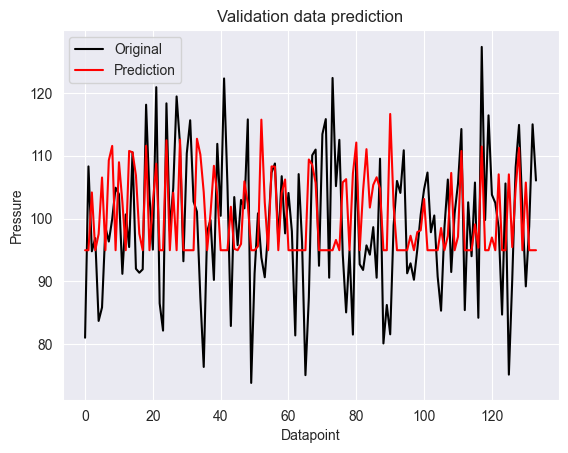

In [49]:
# Predict validation data using the trained model
y_pred = model.predict(X_val)
mse = MeanSquaredError()
val_err = mse(y_val.reshape(-1,1), y_pred)
print("Validation error = ", val_err.numpy())
# Return the value using inverse transform to allow better observation
plt.plot(pres_scaler.inverse_transform(y_val.reshape(-1,1)), 'k', label='Original')
plt.plot(pres_scaler.inverse_transform(y_pred.reshape(-1,1)), 'r', label='Prediction')
plt.ylabel("Pressure")
plt.xlabel("Datapoint")
plt.title("Validation data prediction")
plt.legend()
plt.show()

### Check Test Result
#### The plot indicates that a lot of the data points were inaccurate, which can be caused by the highly fluctuating nature of the hourly data points. 
#### Next, the code will check if the model can predict the sensor reading correctly in the event of anomalies. 
#### We are going to pick another date where failure occurred (2015-05-20).

11/11 [==============================] - 0s 949us/step
Testing error =  0.045363057


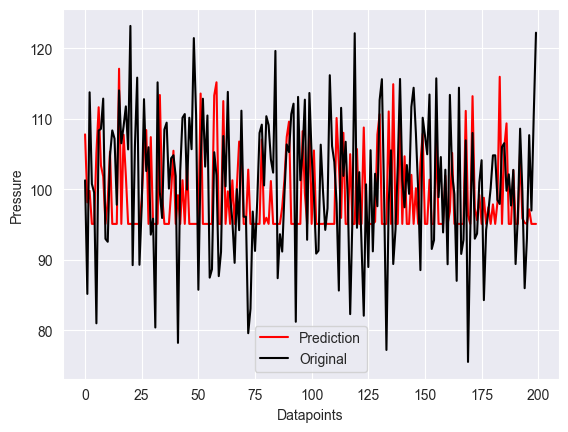

In [50]:
# Select the date where another failure occurred
test2 = df_machine.loc[df_machine['datetime'] == "2015-05-20"].index.values[0]

# Then, filter the data to include approximately two-weeks window
start_period_test = test2 - 7*24
end_period_test = test2 + 7*24
X_test, y_test, test_scalar = create_feature(start_period_test, end_period_test)

# Shape the sequence 
X_test_seq = shape_sequence(X_test, 5, 0)
y_test_seq = shape_sequence(y_test, 1, 0)

# Predict the testing data
y_pred_test = model.predict(X_test_seq)
test_err = mse(y_test_seq.reshape(-1,1), y_pred_test)
print("Testing error = ", test_err.numpy())

# Select first 200 datapoints to allow for better plotting
# Return the value using inverse transform to allow better observation
plt.plot(test_scalar.inverse_transform(y_pred_test[:200].reshape(-1, 1)), 'r', label='Prediction')
plt.plot(test_scalar.inverse_transform(y_test_seq[:200].reshape(-1, 1)), 'k', label='Original')
plt.ylabel("Pressure")
plt.xlabel("Datapoints")
plt.legend()
plt.show()

11/11 [==============================] - 0s 1ms/step
Testing error =  0.045363057


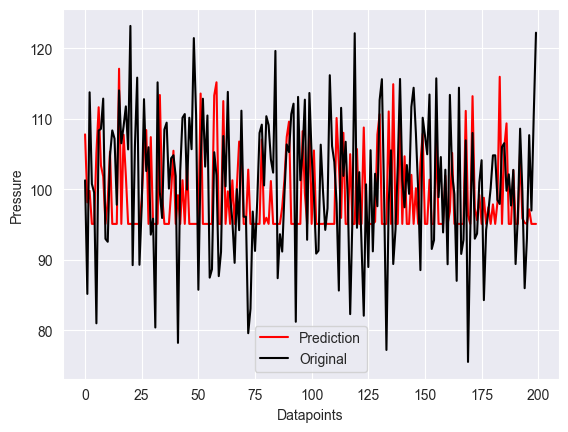

In [52]:
# Select the index where another failure occurred on May 20, 2015
failure_date = "2015-05-20"
test2 = df_machine.loc[df_machine['datetime'] == failure_date].index.values[0]

# Define a two-week window for testing data
window_size = 7 * 24  # Approximately two weeks (24 hours * 7 days)
start_period_test = test2 - window_size
end_period_test = test2 + window_size

# Create features and labels for testing data
X_test, y_test, test_scalar = create_feature(start_period_test, end_period_test)

# Shape the sequences for LSTM input
X_test_seq = shape_sequence(X_test, 5, 0)  # Adjust the sequence_length and target_offset accordingly
y_test_seq = shape_sequence(y_test, 1, 0)  # Adjust the sequence_length and target_offset accordingly

# Predict the testing data using the trained model
y_pred_test = model.predict(X_test_seq)

# Calculate the mean squared error (MSE) for testing data
test_err = mse(y_test_seq.reshape(-1, 1), y_pred_test)
print("Testing error = ", test_err.numpy())

# Select the first 200 datapoints for better plotting
y_pred_test_plot = test_scalar.inverse_transform(y_pred_test[:200].reshape(-1, 1))
y_test_seq_plot = test_scalar.inverse_transform(y_test_seq[:200].reshape(-1, 1))

# Plot the prediction and original data
plt.plot(y_pred_test_plot, 'r', label='Prediction')
plt.plot(y_test_seq_plot, 'k', label='Original')
plt.ylabel("Pressure")
plt.xlabel("Datapoints")
plt.legend()
plt.show()


#### The model can predict the sensor reading even in the event of machine failure. The central key here is to ensure that the training data includes past failure event as well.